### 作業目的: 更加了解word2vec高速化
本次作業主要是幫同學更熟悉與了解透過各項技巧來加速word2vec的原理，同學可以參考章節講義來回答下列問題。

### Q1 - 請問word2vec原本的設計有何問題以及可以怎麼對相對應的問題做改善?

<font color = 'green'>What are the inherent problems of word2vec and how to improve them? </font>

Answer:

#### Problems 
- Computationally costly - Taking CBOW as an example, to train a given corpus, the following stpes have to be conducted: 
  * 1) 2 Matrix operations (from input layer --> hidden layer --> output layer)
  * 2) Calculating distribution of vocabulary using softmax 
  * 3) Calculating loss 
  * 4) backpropagation 
  
  So, when the input corpus is too large, there will be too much input/output layers and thus would require more time and resource for computation. 
- Meaningless computation - Since the input vector is sparse, most operation will involve/result in zeros. 

#### Solutions 
- Using embedding layers - Map the one-hot vector to another dense vector by the index of the word.
  - Solves the problem of memory consumption and computation time of one-hot vector
- Use hierarchical softmax or negative sampling for softmax 
  - Regular softmax can be understood as a tree of depth 1, and finding the probability for a given word would require normalization over the entire tree (all leaves). However, with hierarchical softmax, the corpus is formatted as a binary tree. To go through the tree, calculate the probability of going right or left at each split. 
  


### Q2 - 請問在Negative Sampling中的次方係數，會如何影響字詞的抽取?
Hint: 如何影響高頻詞與低頻詞的抽取機率

<font color = 'green'>How does the exponent of negative sampling affect the sampling of word?</font>

Answer:
As the exponent goes up, words with higher frequencies are sampled more often and lower frequency words infrequently sampled. When the exponent decreases, then words with higher/lower frequencies are sampled at an identical probability. 


Notes: 

The formula for negative sampling is proposed as follows in the original paper: 
$P(w_i) = \frac{f(w_i)^{\frac{3}{4}}}{\sum^{n}_{j=0}(f(w_j)^{\frac{3}{4}})}$


Exponent: 1, frequency: [0.39840637 0.29880478 0.19920319 0.09960159 0.00398406]
Exponent: 0.75, frequency: [0.35897528 0.28930803 0.21344798 0.12691693 0.01135179]
Exponent: 0.5, frequency: [0.31514603 0.27292446 0.22284189 0.15757301 0.0315146 ]
Exponent: 0.25, frequency: [0.26351601 0.24522928 0.22158967 0.18633396 0.08333108]
Exponent: 0.01, frequency: [0.20278032 0.20219779 0.20137961 0.19998858 0.1936537 ]


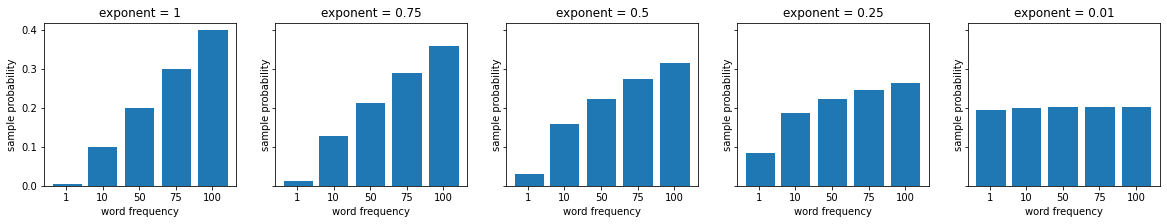

In [78]:
import numpy as np
import matplotlib.pyplot as plt

word_freq = [100, 75, 50, 25, 1] # define word frequency 
exponent = [1, 0.75, 0.5, 0.25, 0.01] # define exponent 
counter = 0
fig, axs = plt.subplots(1, 5, figsize=(20, 3), sharey=True)

for exp in exponent: 
  a = np.power(word_freq, exp)
  b = np.sum(a)
  ans = a/b
  results = [a for a in ans]

  axs[counter].bar(exponent, results, width = 0.2)
  axs[counter].title.set_text("exponent = " + str(exp))
  axs[counter].set_xlabel("word frequency")
  axs[counter].set_ylabel("sample probability")
  axs[counter].set_xticks(np.arange(0, 1, step = 0.249))
  axs[counter].set_xticklabels(['1','10','50','75','100'])
  counter += 1
  print("Exponent: {}, frequency: {}".format(exp, ans))

plt.show()  